### Load and Inspect Data

In [2]:
import pandas as pd

# Load data
df = pd.read_csv("../data/raw/healthcare_analytics_dataset.csv")

# Preview length of stay
df[["length_of_stay", "age", "disease_type", "doctor_specialty"]].head()

,length_of_stay,age,disease_type,doctor_specialty
0,3,4,Diabetes,Cardiology
1,7,26,Cancer,Oncology
2,13,13,Diabetes,Pulmonology
3,2,6,Flu,Pulmonology
4,7,69,Flu,Endocrinology


### Drop Missing or Invalid Entries

In [3]:
# Drop rows where length_of_stay is missing or invalid
df = df[df["length_of_stay"].notnull()]
df = df[df["length_of_stay"] >= 0]  # remove negatives

### Select Features for Prediction

We’ll choose features that could affect stay length.

In [4]:
selected_features = [
    "age",
    "gender",
    "disease_type",
    "doctor_specialty",
    "insurance_status",
    "satisfaction_score",
]

### Encode Categorical Columns

In [5]:
# One-hot encode categoricals
df_encoded = pd.get_dummies(df[selected_features + ["length_of_stay"]], drop_first=True)

# Separate X and y
X = df_encoded.drop(columns="length_of_stay")
y = df_encoded["length_of_stay"]

### Train-Test Split

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

### Train Regression Model

In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Train model
reg_model = RandomForestRegressor(random_state=42)
reg_model.fit(X_train, y_train)

# Predict
y_pred = reg_model.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"R² Score: {r2:.2f}")

MAE: 4.11
R² Score: -0.25


### Visualize Prediction vs Actual

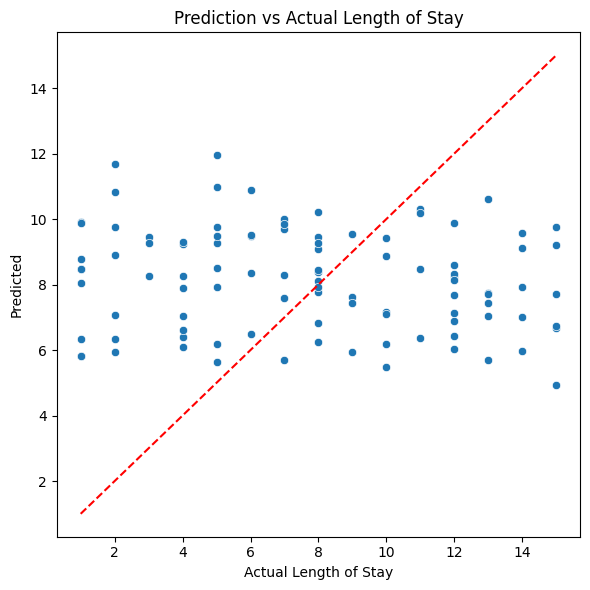

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], "r--")
plt.xlabel("Actual Length of Stay")
plt.ylabel("Predicted")
plt.title("Prediction vs Actual Length of Stay")
plt.tight_layout()
plt.savefig("../visuals/plots/length_of_stay_regression.png")
plt.show()

### Export Predictions

In [9]:
# Reload IDs
ids = df.loc[X_test.index, ["patient_id", "appointment_id"]].reset_index(drop=True)

# Build result df
results = pd.DataFrame(
    {
        "actual_length_of_stay": y_test.reset_index(drop=True),
        "predicted_length_of_stay": y_pred,
    }
)

results = pd.concat([ids, results], axis=1)

# Save
results.to_csv("../data/processed/cleaned/length_of_stay_predictions.csv", index=False)
print("✅ Exported predictions to /data/processed//cleaned/length_of_stay_predictions.csv")

✅ Exported predictions to /data/processed//cleaned/length_of_stay_predictions.csv
